## Discovering impact of the Series 'Euphoria' through NLP
### Analysis based on posts and comments on the `r/euphoria` subreddit  

#### 2. EDA

Goal: Summarize main characteristics of dataset  
I: corpus and TDM  
O: trands in data if it makes sense  

Some ideas:  
- top words for each post
- vocabulary
- profanity
- specific drug frequency 

`wordcloud` & `matplotlib`

In [1]:
# import data
import pandas as pd

data = pd.read_pickle('../dat/tdm.pkl')
# rename rows
# data = data.rename(index = {0: 'A', 1: 'B', 2: 'C'})
data

,ab,aback,abaedefabdfef,abafbfbedbada,abandon,abandoned,abandoning,abandonment,abandons,abashed,...,zorbcaps,zoted,zouabi,zoya,zqcsrpwsge,zrue,zs,zsuzsana,zurich,zy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19191,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**19,288 comments(documents)**

In [2]:
# get the top 30 words

def get_top(df):
    freq = []
    for word in df.columns:
        freq.append((word, df[word].sum()))
    freq = sorted(freq, key=lambda x: x[1], reverse=True)
    return freq[:30]

In [3]:
get_top(data)

[('rue', 10882),
 ('like', 7305),
 ('jules', 7153),
 ('just', 6221),
 ('think', 5825),
 ('people', 3864),
 ('know', 3116),
 ('going', 2943),
 ('did', 2874),
 ('really', 2836),
 ('season', 2808),
 ('does', 2530),
 ('drugs', 2381),
 ('nate', 2310),
 ('way', 2194),
 ('episode', 2139),
 ('feel', 2064),
 ('elliot', 1934),
 ('cassie', 1867),
 ('fez', 1831),
 ('love', 1808),
 ('character', 1789),
 ('said', 1779),
 ('time', 1725),
 ('want', 1616),
 ('stil', 1546),
 ('good', 1532),
 ('lot', 1407),
 ('relationship', 1391),
 ('make', 1385)]

In [4]:
# thinking need to go back to `analysis.ipynb` and lemmatize the words. brb.

Thinking: if all three posts have the same top words - it may not provide any meaningul insight. Should write a logic to add words to the stopwords list if the word is common for all posts

In [5]:
# add_stopwords = [word for word, count in Counter(words).most_common() if count == 3]
add_stopwords = ['series', 'turning', 'point', 'rue', 'just']

In [6]:
# update TDM with new list of stop words
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# read cleaned data
corpus = pd.read_pickle('../dat/corpus.pkl')

In [7]:
# add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stopwords)

# recreate TDM
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(corpus[0])
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = corpus.index

In [8]:
# pickle TDM
import pickle
pickle.dump(cv, open('../dat/cv_stop.pkl', 'wb'))
data_stop.to_pickle('../dat/tdm_stop.pkl')

**Visualize**

In [9]:
# create a list of all the words in all the comments
comment_word_ls = []
for comment in corpus[0]:
    words = comment.split()
    for word in words:
        comment_word_ls.append(word)

In [10]:
comment_words = ' '.join(comment_word_ls)

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color='white',colormap = 'Dark2', max_font_size=40, random_state=2022, max_words=500)

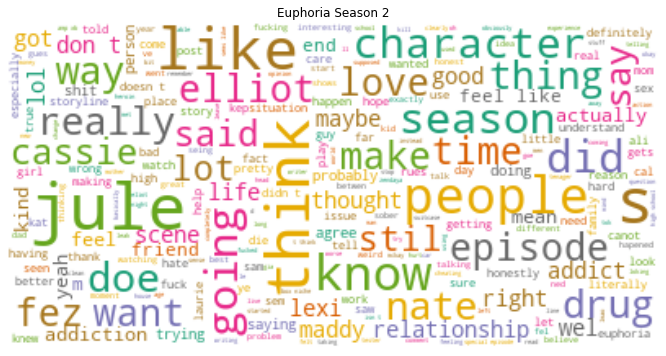

In [12]:
plt.rcParams['figure.figsize'] = (16, 6)
wc.generate(comment_words)
plt.title('Euphoria Season 2')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### 2.2 Vocabulary

In [13]:
data.head()

,ab,aback,abaedefabdfef,abafbfbedbada,abandon,abandoned,abandoning,abandonment,abandons,abashed,...,zorbcaps,zoted,zouabi,zoya,zqcsrpwsge,zrue,zs,zsuzsana,zurich,zy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
term_document_matrix = data.T
term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)

In [15]:
# Top 100 words 
term_document_matrix = term_document_matrix.sort_values(by ='total_count',ascending=False)[:100] 

# Print the first 10 rows 
print(term_document_matrix.drop(columns=['total_count']).head(10))

        0      1      2      3      4      5      6      7      8      9      \
rue         0      1      0      0      0      0      0      0      0      0   
like        0      0      0      0      1      2      0      1      0      0   
jules       0      0      0      0      0      0      0      0      0      0   
just        0      0      0      0      0      1      0      0      1      0   
think       0      0      1      0      0      1      1      0      1      0   
people      0      0      0      0      0      1      0      0      0      0   
know        0      0      0      0      0      0      0      0      0      0   
going       0      0      0      2      0      3      0      0      0      1   
did         0      0      0      0      0      0      0      0      0      0   
really      0      0      0      0      1      0      0      0      0      0   

        ...  19186  19187  19188  19189  19190  19191  19192  19193  19194  \
rue     ...      0      0      0      0  

<AxesSubplot:>

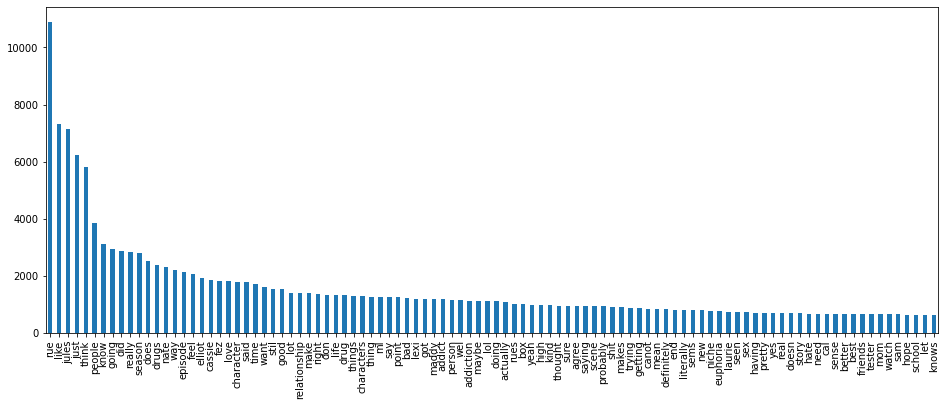

In [16]:
term_document_matrix['total_count'].plot.bar()

**Looking at the frequency of certain drug related words**

In [17]:
# isolate drug words
drug_words = ['drug', 'drugs', 'addict', 'addiction', 'opiate', 'opioids', 'dope', 'marijuana'
                   'weed', 'zoloft', 'xanax', 'high', 'dose', 'trigger', 'triggering', 'relapse', 'sober', 'sobriety','fentanyl',
                   'heroin', 'crack', 'cocaine', 'amphetamine', 'speed', 'acid', 'ecstasy', 'lsd', 'shrooms',
                   'psychadelics', 'narcotic', 'rehab', 'recovery', 'treatment', 'methadone', 'naloxone']

# filter data if any column is in drug_words
filter_ls = [data_stop.columns[i] in drug_words for i in range(len(data_stop.columns))]
drug_cols = data_stop[data_stop.columns[filter_ls]]
# arrange columns by values
drug_cols = drug_cols.sort_values(by=drug_cols.columns[0], ascending=False)
drug_cols

,acid,addict,addiction,amphetamine,cocaine,crack,dope,dose,drug,drugs,...,narcotic,opiate,opioids,recovery,rehab,relapse,sober,sobriety,treatment,xanax
1363,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
18618,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18542,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10759,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18638,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6401,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6400,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6399,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='rue', ylabel='elliot'>

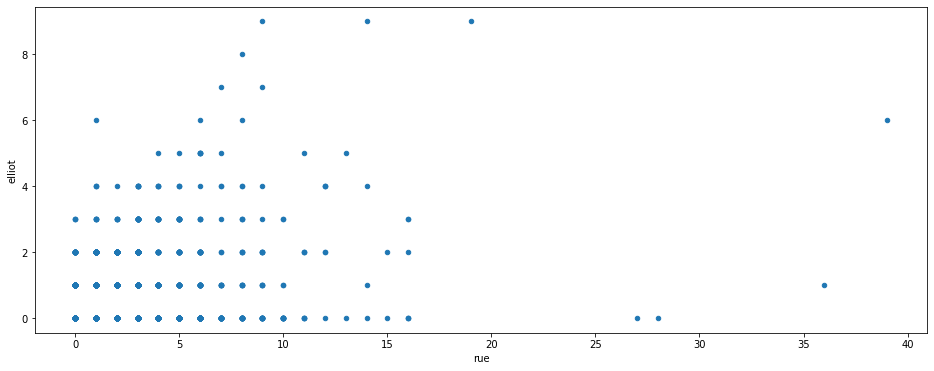

In [18]:
# Locate rue and elliot in the documents, example
term_document_matrix.loc[['rue', 'elliot']].T

# Create a scatterplot of the frequencies
term_document_matrix.drop(columns=['total_count']).T.plot.scatter(x='rue', y='elliot')

<AxesSubplot:xlabel='rue', ylabel='addict'>

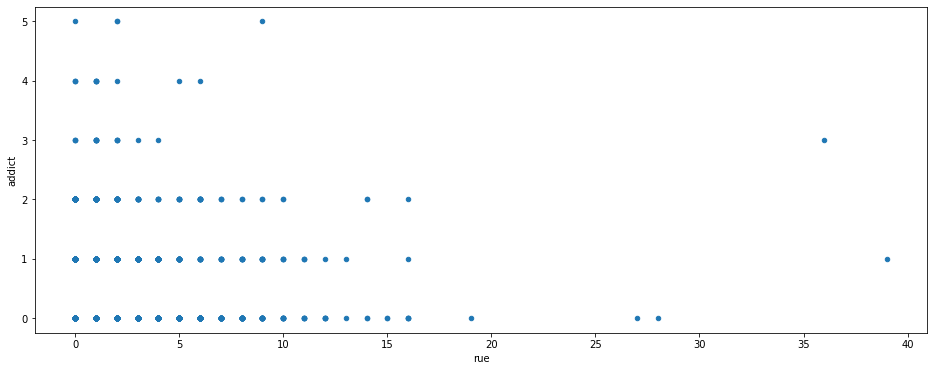

In [19]:
# let's try rue and fentanyl
term_document_matrix.loc[['rue', 'addict']].T

# Create a scatterplot of the frequencies
term_document_matrix.drop(columns=['total_count']).T.plot.scatter(x='rue', y='addict')

this is a scatterplot of frequencies for rue and elliot across 100 documents(comments).

**Cosine Similarity**

In [20]:
# keep TDM only with the top 100 words - full vocabulary takes too long
# term_document_matrix = data.T

In [21]:
# Activate math
# import math

# # Define a cosine similarity function
# def cosine_similarity(a,b):
#     "compute cosine similarity of v1 to v2: (a dot b)/{||a||*||b||)"
#     sumxx, sumxy, sumyy = 0, 0, 0
#     for i in range(len(a)):
#         x = a[i]; y = b[i]
#         sumxx += x*x
#         sumyy += y*y
#         sumxy += x*y
#     return sumxy/math.sqrt(sumxx*sumyy)

In [22]:
# cosine similarity function for all comments
# account for zero values to avoid division by zero

from sklearn.metrics.pairwise import cosine_similarity

# compute cosine similarity between all comments
# using term_document_matrix

def comment_sim(mat):
    # pair wise similarity between all comments
    sim = cosine_similarity(mat)
    # create a dataframe of the similarities
    sim_df = pd.DataFrame(sim, columns=mat.index, index=mat.index)
    # return the dataframe
    return sim_df

In [23]:
test = comment_sim(term_document_matrix)

In [24]:
# cosine similarity heat map
import matplotlib.pyplot as plt

# rename 
documents = ['com ' + str(i) for i in range(len(term_document_matrix.columns))]

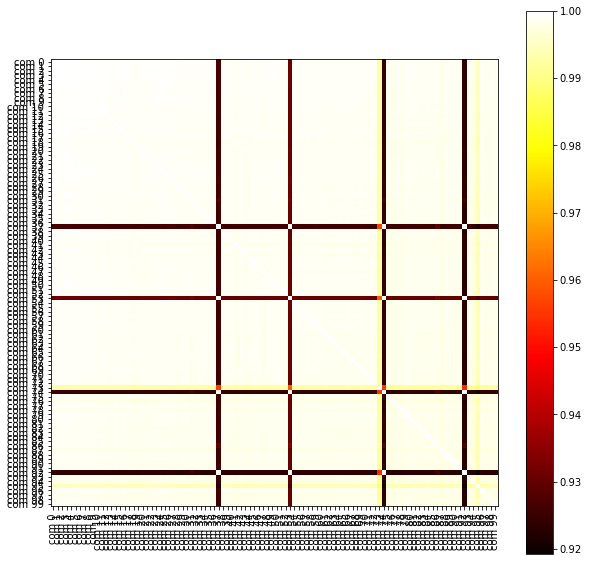

In [25]:
# create a heatmap of the similarities

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xticks(range(len(documents)))
ax.set_yticks(range(len(documents)))
ax.set_xticklabels(documents, rotation=90)
ax.set_yticklabels(documents)
plt.imshow(test, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

---

Re-attempt at TDM, CS, and heatmap but with subset of original data

In [26]:
# Count Vectorizer
vect = CountVectorizer()  
vects = vect.fit_transform(corpus[0])

# Select the first fifty rows from the data set
td = pd.DataFrame(vects.todense()).iloc[:50]  
td.columns = vect.get_feature_names()
term_document_matrix2 = td.T
term_document_matrix2.columns = ['Doc '+str(i) for i in range(1, 51)]
term_document_matrix2['total_count'] = term_document_matrix2.sum(axis=1)

# Top 100 words 
term_document_matrix2 = term_document_matrix2.sort_values(by ='total_count',ascending=False)[:100] 

# Print the first 10 rows 
print(term_document_matrix2.drop(columns=['total_count']).head(10))

      Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  Doc 10  \
the       1      1      1      2      0      3      0      2      2       0   
to        0      1      0      1      0      7      2      4      0       2   
and       0      0      0      0      1      5      0      2      1       0   
is        1      1      1      1      0      0      0      1      2       0   
of        0      0      1      3      1      1      0      0      0       0   
her       0      0      0      0      2      0      0      0      0       0   
it        1      0      0      1      0      4      1      1      1       2   
she       0      1      0      0      0      0      0      1      0       0   
that      0      0      0      0      0      4      0      0      0       1   
not       0      0      0      0      1      2      0      0      1       0   

      ...  Doc 41  Doc 42  Doc 43  Doc 44  Doc 45  Doc 46  Doc 47  Doc 48  \
the   ...       0       5       1       4       0    

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
# Activate math
import math

# Define a cosine similarity function


def cosine_similarity(a, b):
    "compute cosine similarity of v1 to v2: (a dot b)/{||a||*||b||)"
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(a)):
        x = a[i]
        y = b[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    if sumxx == 0 or sumyy == 0:
        return 0
    else:
        return sumxy/math.sqrt(sumxx*sumyy)


In [28]:
# Activate numpy
import numpy as np 

# Save the similarity index between the documents
def pair(s):
    for i, v1 in enumerate(s):
        for j in range(i+1, len(s)):
            yield [v1, s[j]]

In [29]:
#  calculate similiarity index for each document
dic={} 
for (a,b) in list(pair(term_document_matrix2.columns)):
  dic[(a,b)] = cosine_similarity(term_document_matrix2[a].tolist(), term_document_matrix2[b].tolist())

# Print the cosine similarity index
# print(dic)

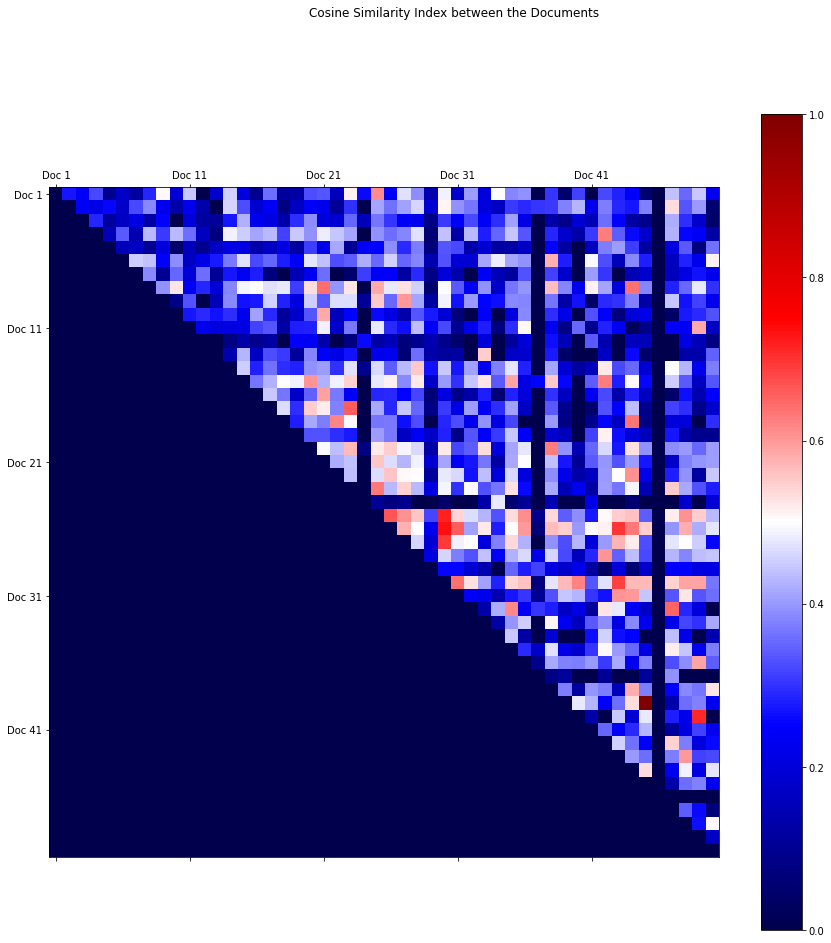

In [30]:
documents= ['Doc ' + str(i) for i in range(1, 51)]
final_df = pd.DataFrame(np.asarray([[(dic[(x,y)] if (x,y) in dic else 0) for y in documents] for x in documents]))
final_df.columns =  documents
final_df.index = documents 

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
ax.set_xticks(np.arange(len(documents)))
ax.set_yticks(np.arange(len(documents)))
ax.set_xticklabels(documents)
ax.set_yticklabels(documents)
# for (i, j), z in np.ndenumerate(final_df):
#   if z != 0 :
#     ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
#             bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
#   else:
#     None
fig.suptitle('Cosine Similarity Index between the Documents')
# show legend
ax.matshow(final_df, cmap='seismic')
fig.colorbar(mappable=ax.matshow(final_df, cmap='seismic'))
plt.show()

In [31]:
# looks like we have some very similar documents : looks like between Doc 30 and Docs 27,26,25
# lets look at their similarities
# subset the dataframe to only include the documents we want

sim_docs = pd.DataFrame(final_df.iloc[24:30,24:30])
sim_docs

,Doc 25,Doc 26,Doc 27,Doc 28,Doc 29,Doc 30
Doc 25,0.0,0.665842,0.605530,0.557773,0.317543,0.717198
Doc 26,0.0,0.000000,0.575982,0.496104,0.229656,0.731387
Doc 27,0.0,0.000000,0.000000,0.460566,0.190693,0.694311
Doc 28,0.0,0.000000,0.000000,0.000000,0.207020,0.458167
Doc 29,0.0,0.000000,0.000000,0.000000,0.000000,0.257012
Doc 30,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [32]:
# let's grab the original comment for the documents we want
# for doc30, doc27, doc26, doc25

doc_30 = corpus[0][29]
doc_27 = corpus[0][26]
doc_26 = corpus[0][25]
doc_25 = corpus[0][24]

print('these are the comments that are most similar to *Doc 30*: ','\n','--', doc_30, '\n','--', doc_27, '\n','--', doc_26, '\n','--', doc_25)

these are the comments that are most similar to *Doc 30*:  
 -- the whole point of rue i am going to is that she is supposed to give the viewers a real addicts point of view i think she is a person who is gone through a lot and been turned roten by drugs she is not a terible person when she was not an addict but now that she is the drugs have changed her i feel bad for her and think she is being shity right now but i canot bring myself to hate her i have seen the devastation addiction can cause and stil i canot help but see the normal person in her underneath it all 
 -- agree ill never get why people like her i have dated addicts and the ugly you see them go to is devastating the mom telling her she is not a good person was spot on the bojack reference is on point 
 -- i hate the idea that all addicts are like her they are not plenty of addicts have much worst habits and for much longer and are not of shity as a person as rue is is she an acurate representation of an addict to an exte